## 词云
- 数据导入
- 数据处理组件
- 词云参数，词云预览
- 重新着色组件
- 图形遮罩
- 输出

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### 数据导入
- 修改括号内路径即可
- csv文件：read_csv()
- xlxs文件：read_excel(); argument： sheet = ''可以选定工作表

In [2]:
# Data to dataframe
df = pd.read_csv('./data/download1663327321888.csv')

df.head()

,关键词,SUM(曝光量（脱敏）),14日曝光环比,笔记数（脱敏）
0,空气炸锅,44330938.53,0.028097,6000.00
1,食谱,44330938.53,0.033356,5500.00
2,鸡蛋,42217958.32,0.033581,5300.00
3,减脂,25257063.00,0.030227,5117.60
4,减肥,22654213.97,0.030041,4137.19


### 数据处理组件
获取栏目名，重新命名

In [3]:
df.columns

Index(['关键词', 'SUM(曝光量（脱敏）)', '14日曝光环比', '笔记数（脱敏）'], dtype='object')

In [4]:
names = ['keyword','exp','14d','newnotes']
df.columns = names

选择需要的两列*，选择前100条数据* （*标注部分可以自定义）

In [5]:
df_wc = df[['keyword', 'newnotes']][0:99]

In [19]:
### string conversion to prevent WordCloud running into a bug
df_wc.keyword = df_wc.keyword.astype('string')

In [20]:
#dictionary transformation 
wc_dict = {}
for word, freq in df_wc.values:
    wc_dict[word] = freq

字体地址

In [21]:
font_path = './font/simhei.ttf'

### 词云参数
写在（）中，每一项都需要逗号结尾
- font_path : 字体地址
- width & height： 图像宽度&图像高度
- max_font_size: 最大字体大小
- mask: 遮罩
- random_state: 随机位置，可以调整单词散布方式
- background_color: 背景颜色； 透明背景是： background_color= 'rgba(255,255,255,0)', mode = 'RGBA',
- contour_color: 遮罩轮廓颜色
- contour_width: 遮罩轮廓线宽

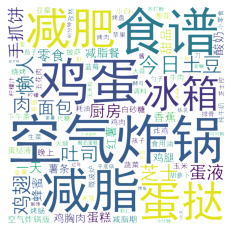

In [22]:
#Pass in argument for WC
wc = WordCloud(
   font_path = font_path, 
    width = 1000,
    height = 1000,
    max_font_size= 250,
    random_state= 16,
    background_color= 'rgba(255,255,255,0)',
    mode = 'RGBA',)


wc.generate_from_frequencies(wc_dict)

#.recolor method
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 重新着色组件
- 可使用#custom colors 代码自定义colormap
- 也可以直接使用matplotlib已有的colormap，参考地址：http://matplotlib.org/stable/tutorials/colors/colormaps.html
    - 常用colormap：Set2， Autumn

In [9]:
#custom colors
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('',['#FF2442', '#FF9E99','#FFCCCC'])

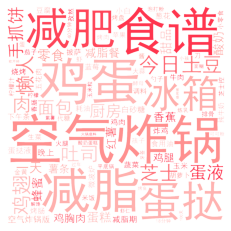

In [10]:
plt.imshow(wc.recolor(colormap=cmap), interpolation='bilinear')
plt.axis('off')
plt.show()

### 遮罩组件
- 遮罩导入
- 遮罩处理（反色）
- 从遮罩图片获取颜色

建议使用png文件作为遮罩，推荐遮罩为黑白色色轮廓清晰（ie ppt自带的图标）

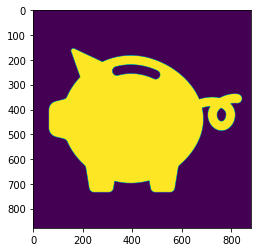

In [11]:
mask = np.array(Image.open('./mask/piggie.png'))
plt.imshow(mask)

In [12]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### 遮罩处理-反色
文字需要放在遮罩内而不是空白处，所以需要对遮罩进行反色处理

In [13]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
        
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]))
for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

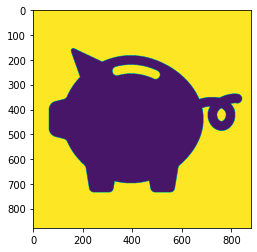

In [14]:
plt.imshow(transformed_mask)

#### 从图片获取颜色
如果需要词云对应彩色图片颜色

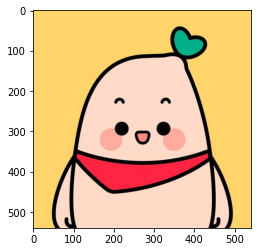

In [15]:
imageforColors = np.array(Image.open('./mask/captain_red.jpg'))
plt.imshow(imageforColors)
#create coloring from image
image_colors = ImageColorGenerator(imageforColors)

#### 词云参数
- mask = 处修改要使用的遮罩，演示原因最终没有采纳反色后的小猪遮罩transformed_mask, 无重新着色需求但需要清晰形状请使用遮罩预处理组件。


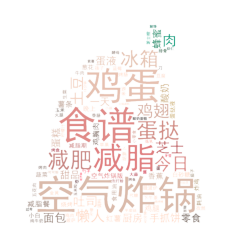

In [16]:
#Pass in argument for WC
mask = np.array(Image.open('./mask/captain_red_mask.png'))
wc = WordCloud(
   font_path = font_path, 
    width = 500,
    height = 500,
    mask = mask,
    random_state= 2,
    background_color= 'rgba(255,255,255,0)',
    mode = 'RGBA',)


wc.generate_from_frequencies(wc_dict)

#.recolor method
plt.imshow(wc.recolor(color_func = image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

### 输出

In [17]:
#Saving the wordcloud to file
wc.to_file('./wordcloud.png')

### Reference：
- Andreas Mueller(2020), wordcloud, avaliable at:amueller.github.io/word_cloud/
- Duong Vu(2019), Generating WordClouds in Python Tutorial, avaliable at: www.datacamp.com/tutorial/wordcloud-python